In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib import gridspec

import sys
from os.path import dirname, abspath
import os
sys.path.append(dirname(dirname(abspath('__file__')))+'/utils')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [54]:
## Input the filenames and parameters:
filename = 'basic_ts_sim_with_UE_02.pkl'
original_indices = 'orig_x.npy'
full_indices = 'full_time_index.npy'
interpolation_method = 'original'

In [55]:
## Create variables with directories to external files:
directory = os.path.join(os.getcwd(), 'data_files/')
file_data = os.path.join(directory, filename)
file_full_indices = os.path.join(directory, full_indices)
file_orig_indices = os.path.join(directory, original_indices)

In [56]:
## Import the measurements:
data_imported = pd.read_pickle(file_data)
data_df = data_imported['time-series with UE']

## Load and calculate x-axis index:
orig_x = np.load(file_orig_indices)
full_x = np.load(file_orig_indices) 
indices = [int(i*365.25/11) for i in orig_x]

## Load the answers (ground truth):
points = pd.DataFrame(data_imported['list of UE'], index = data_imported.index)
points.columns = ['points']
segm_lines = pd.DataFrame(data_imported['segm_lines'], index = data_imported.index)
segm_lines.columns = ['segm_lines']

In [53]:
data_imported_segm = data_imported.copy(deep=True) 

In [47]:
data_imported["segm_lines"][data_imported["segm_lines"].map(lambda x: len(x)>2)][:30]

0        [21, 78, 240]
2        [44, 70, 230]
5        [21, 97, 132]
7       [72, 241, 257]
10      [93, 123, 261]
11       [44, 69, 247]
15       [35, 53, 187]
16      [59, 236, 265]
19     [122, 154, 230]
22      [85, 186, 275]
24      [41, 110, 249]
37      [82, 187, 245]
39      [33, 193, 239]
40       [62, 95, 237]
46      [67, 220, 275]
49      [97, 187, 241]
50     [199, 215, 248]
57     [154, 189, 220]
58      [89, 150, 210]
60     [135, 196, 243]
62     [116, 210, 264]
70      [74, 118, 211]
83      [60, 107, 234]
91      [88, 163, 201]
95       [32, 86, 246]
98       [22, 68, 228]
103     [82, 161, 279]
108     [21, 109, 213]
109      [15, 37, 216]
112    [110, 179, 216]
Name: segm_lines, dtype: object

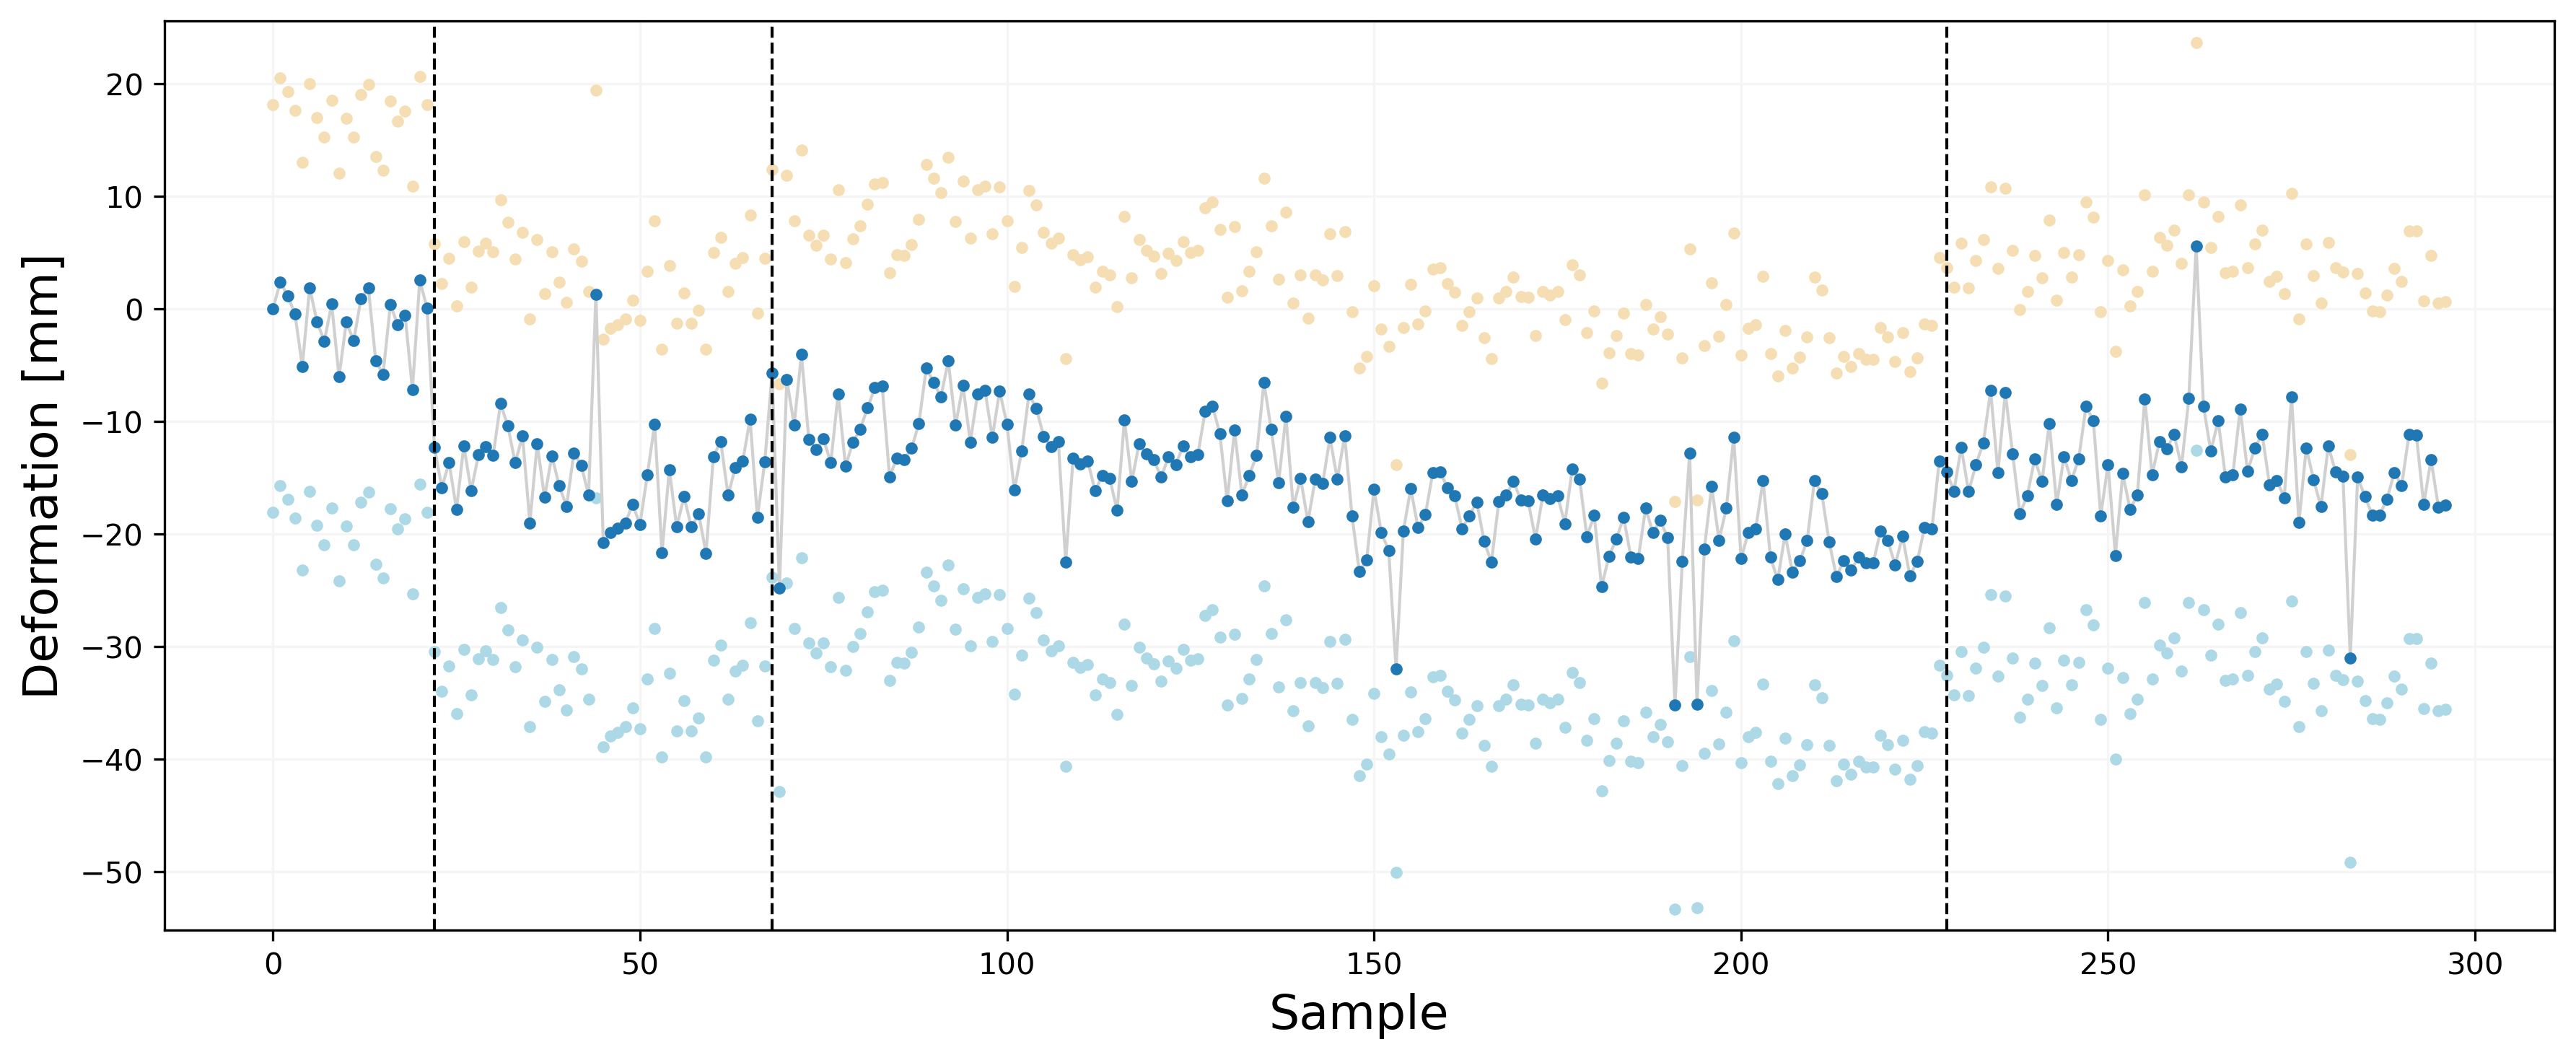

In [52]:
ts_num = 98
ts = data_imported_segm["time-series with UE"].iloc[ts_num].T
segm_lines = data_imported_segm["segm_lines"][ts_num]

fig = plt.figure(figsize=(12,5), dpi=300)
ax = plt.gca()

ax.set_xlabel("Sample", fontsize=16)
ax.set_ylabel("Deformation [mm]", fontsize=16)
ax.grid(True, color="whitesmoke")
ax.set_axisbelow(True)
ax.plot(range(297), data_df.iloc[ts_num].T, '-o', markersize=3, linewidth=1, 
        color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0')
ax.scatter(range(297), data_df.iloc[ts_num].T + 18.1, s=9,
                c="wheat")
ax.scatter(range(297), data_df.iloc[ts_num].T - 18.1, s=9,
                c="lightblue")

if (data_df.iloc[ts_num].max() < 5):
    ax.set_ylim(top=25)
else:
    ax.set_ylim(top=data_df.iloc[ts_num].max() + 20)
if (data_df.iloc[ts_num].min() > -10):
    ax.set_ylim(bottom=-40)
else:
    ax.set_ylim(bottom=data_df.iloc[ts_num].min() - 20)
    
for j in segm_lines:
    ax.axvline(j, linestyle='--', linewidth=1, color='black')
    
fig.tight_layout()

### Save the plot ###
    
# fig.savefig(str(ts_num) +'.jpg', bbox_inches="tight")    
plt.show()

### &#8595;&#8595;&#8595; place for generating a plot &#8595;&#8595;&#8595;

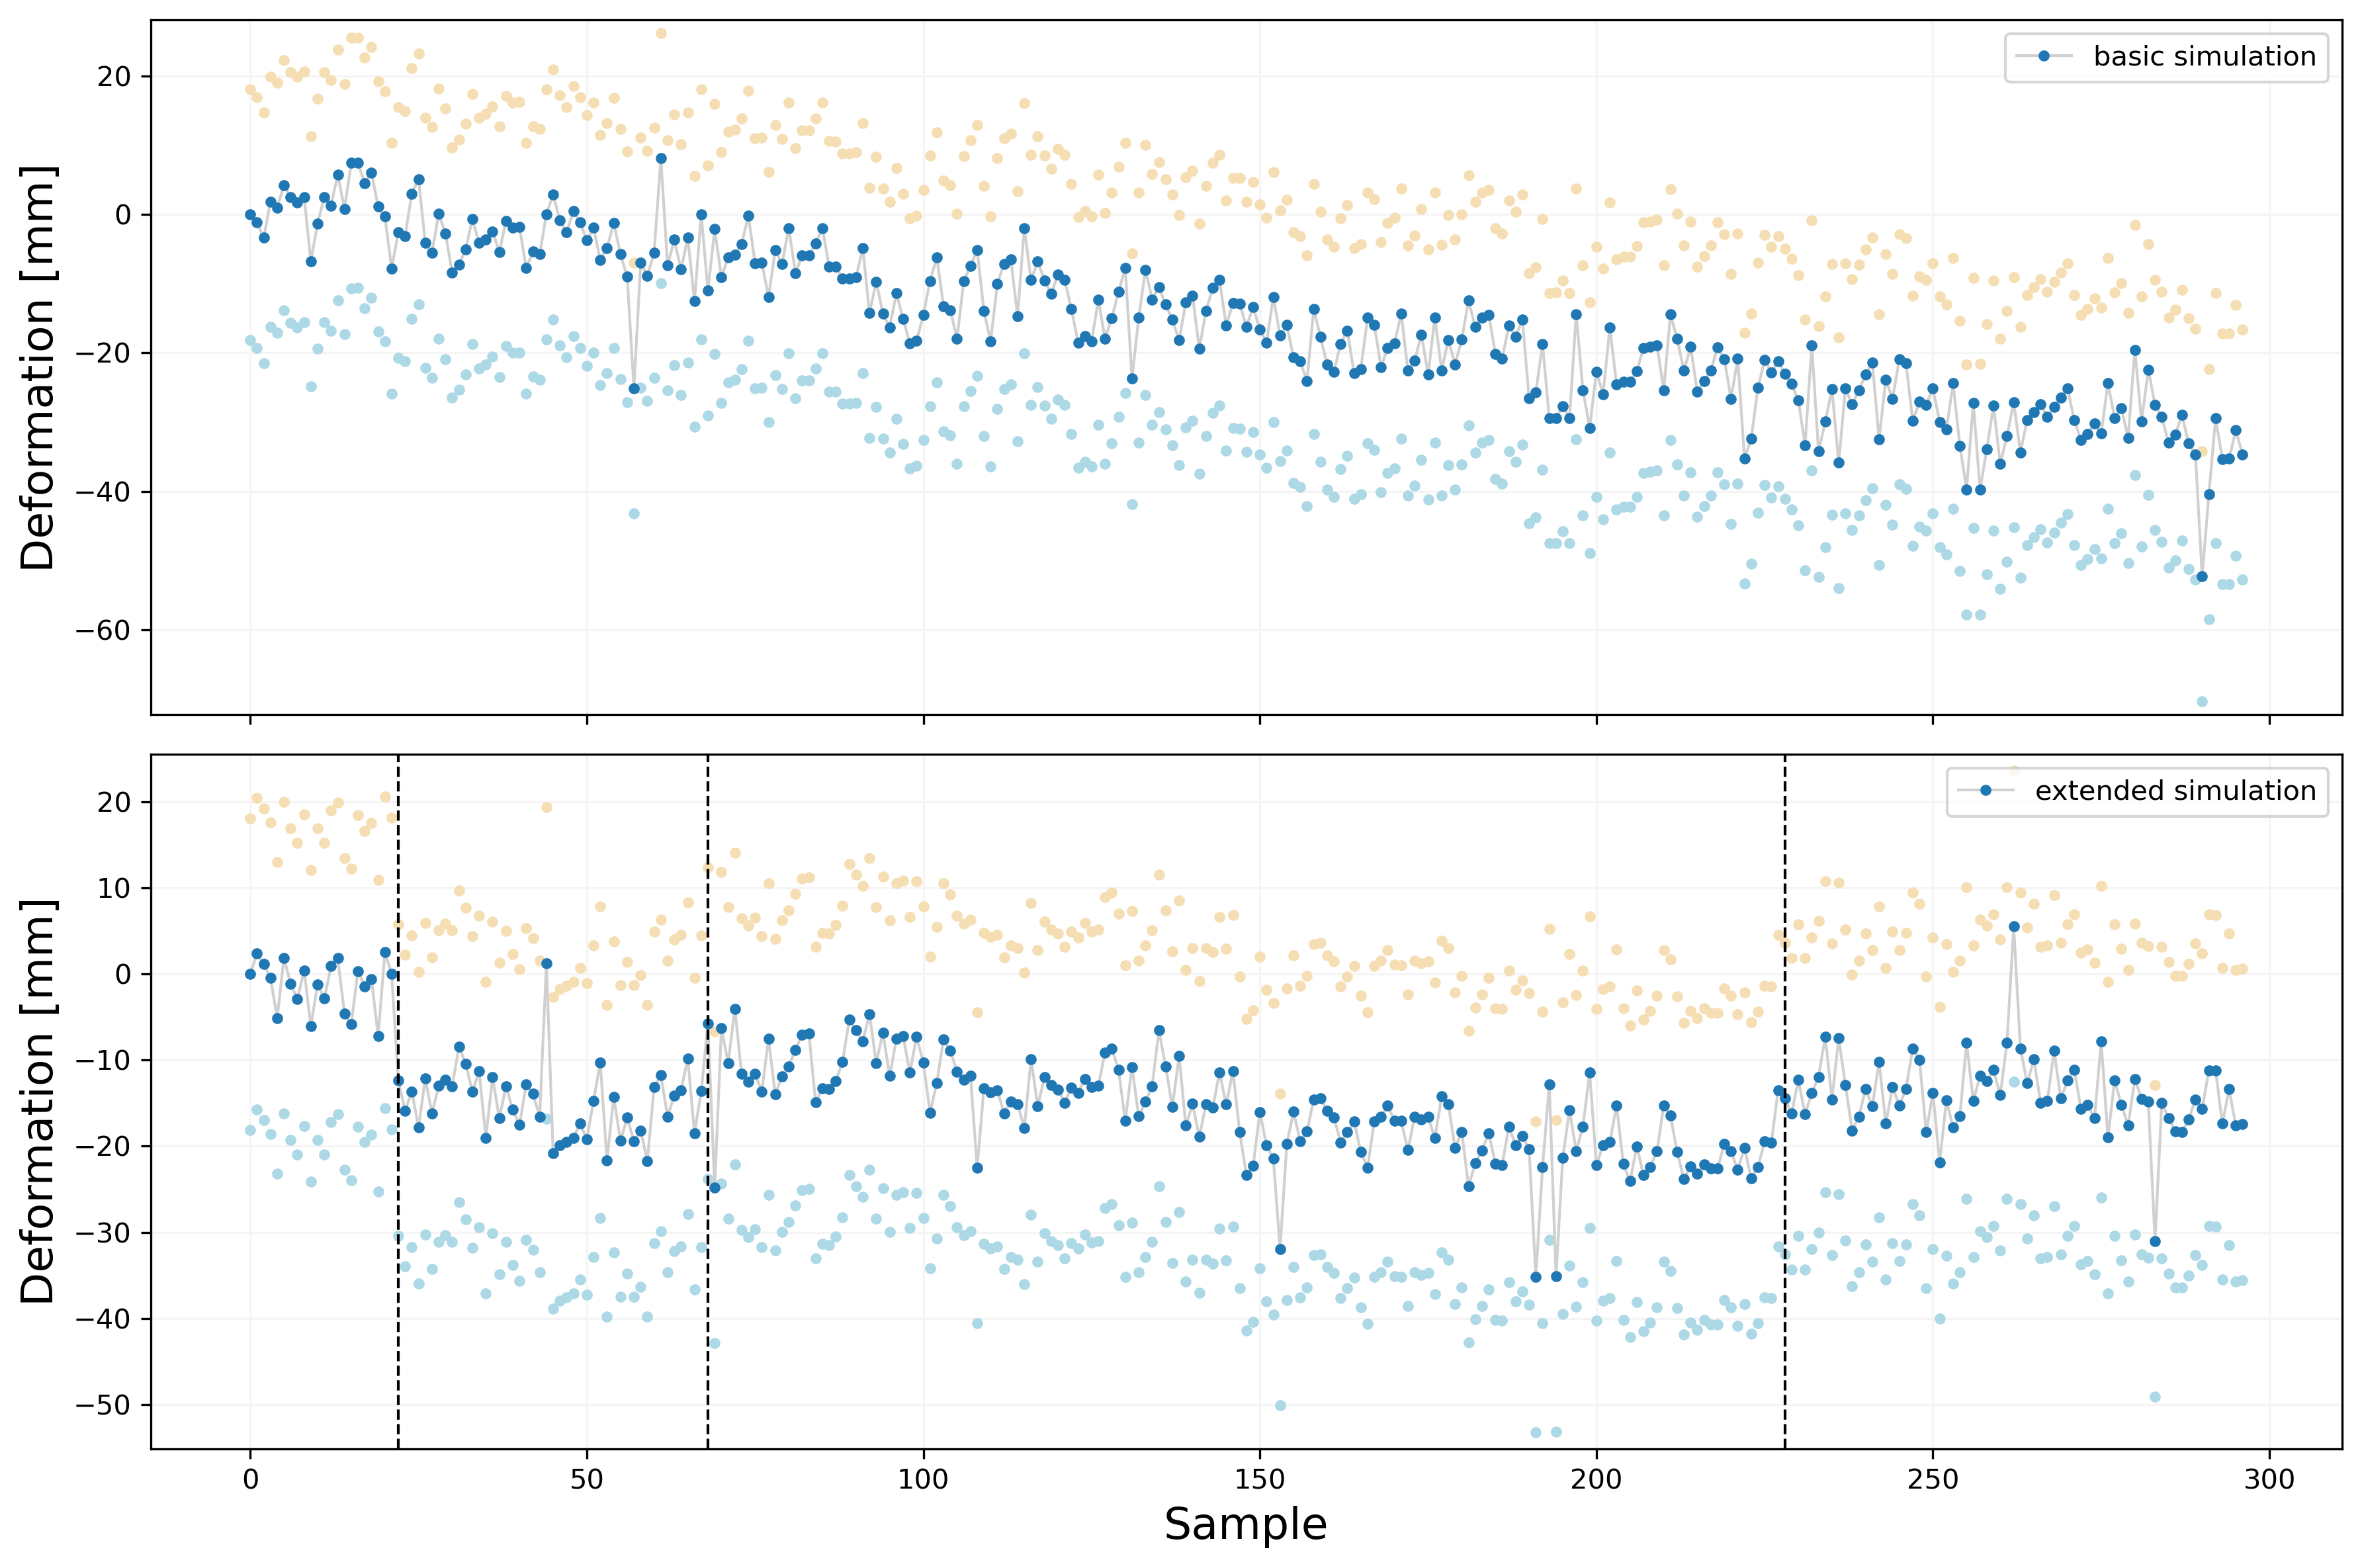

In [70]:
ts_num_seg = 98
ts_segm = data_imported_segm["time-series with UE"].iloc[ts_num_seg].T
segm_lines = data_imported_segm["segm_lines"][ts_num_seg]

ts_num = 113
ts = data_imported["time-series with UE"].iloc[ts_num].T

fig = plt.figure(figsize=(12,8), dpi=300)
gs = gridspec.GridSpec(2, 1) 
ax0 = plt.subplot(gs[1], sharex = ax1)

ax0.set_ylabel("Deformation [mm]", fontsize=16)
ax0.grid(True, color="whitesmoke")
ax0.set_axisbelow(True)

l0, = ax0.plot(range(297), ts_segm, '-o', markersize=3, linewidth=1, 
        color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0', label="extended simulation")
ax0.scatter(range(297), ts_segm + 18.1, s=9,
                c="wheat")
ax0.scatter(range(297), ts_segm - 18.1, s=9,
                c="lightblue")

if (ts_segm.max() < 5):
    ax0.set_ylim(top=25)
else:
    ax0.set_ylim(top=ts_segm.max() + 20)
if (ts_segm.min() > -10):
    ax0.set_ylim(bottom=-40)
else:
    ax0.set_ylim(bottom=ts_segm.min() - 20)

for j in segm_lines:
    ax0.axvline(j, linestyle='--', linewidth=1, color='black')

ax1 = plt.subplot(gs[0])
ax0.set_xlabel("Sample", fontsize=16)
ax1.set_ylabel("Deformation [mm]", fontsize=16)
ax1.grid(True, color="whitesmoke")
ax1.set_axisbelow(True)
l1, = ax1.plot(range(297), ts, '-o', markersize=3, linewidth=1, 
        color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0', label="basic simulation")
ax1.scatter(range(297), ts + 18.1, s=9,
                c="wheat")
ax1.scatter(range(297), ts - 18.1, s=9,
                c="lightblue")

if (ts.max() < 5):
    ax1.set_ylim(top=25)
else:
    ax1.set_ylim(top=ts.max() + 20)
if (ts.min() > -10):
    ax1.set_ylim(bottom=-40)
else:
    ax1.set_ylim(bottom=ts.min() - 20)


plt.subplots_adjust(hspace=.03)
plt.setp(ax1.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

ax0.legend(handles=[l0], loc="upper right")
ax1.legend(handles=[l1])

fig.tight_layout()

### Save the plot ###
    
# fig.savefig('basic_and_extended_sim_examples.jpg', bbox_inches="tight")    
plt.show()


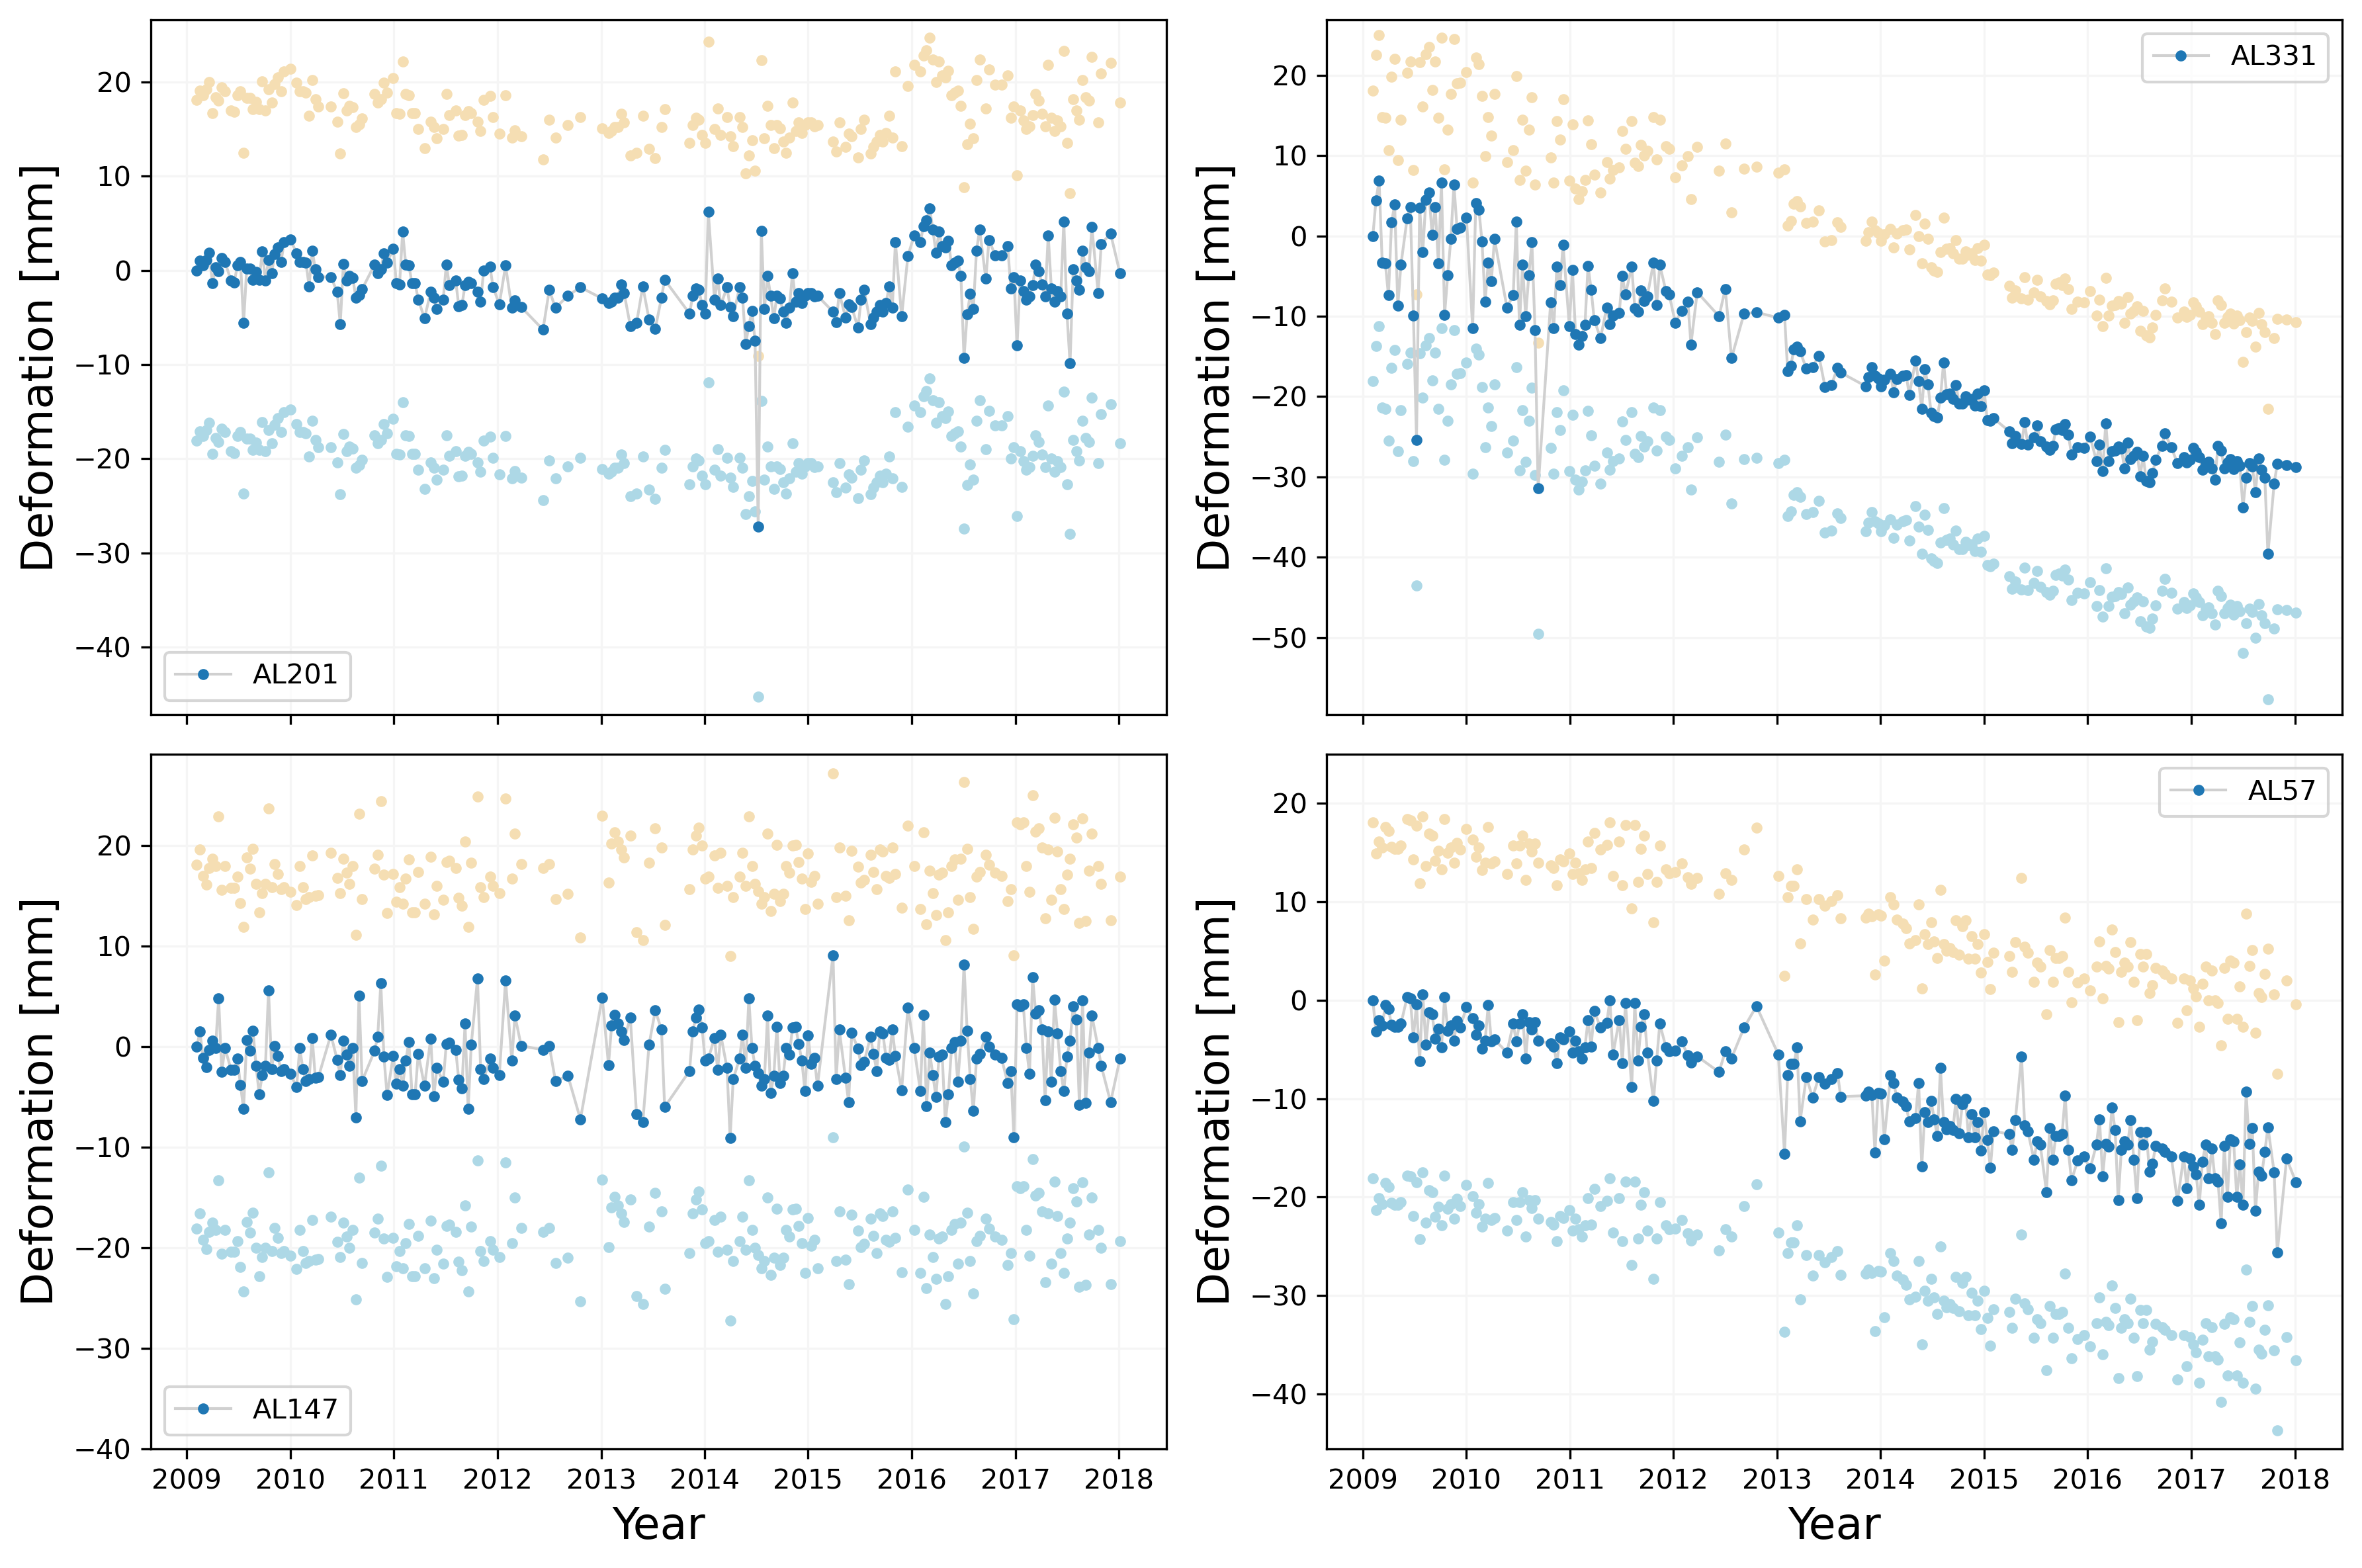

In [16]:
ts_num_1 = 201
ts_num_2 = 331
ts_num_3 = 147
ts_num_4 = 57

fig = plt.figure(figsize=(12,8), dpi=300)
gs = gridspec.GridSpec(2, 2) 
ax0 = plt.subplot(gs[0])

ax0.set_ylabel("Deformation [mm]", fontsize=16)
ax0.grid(True, color="whitesmoke")
ax0.set_axisbelow(True)
l0, = ax0.plot(mydata.columns, mydata.iloc[ts_num_1, :].T, '-o', 
               markersize=3, linewidth=1, color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0', label=f'AL{ts_num_1}')
ax0.scatter(mydata.columns, mydata.iloc[ts_num_1, :].T + 18.1, s=9,
                c="wheat")
ax0.scatter(mydata.columns, mydata.iloc[ts_num_1, :].T - 18.1, s=9,
                c="lightblue")

if (mydata.iloc[ts_num_1, :].max() < 5):
    ax0.set_ylim(top=25)
else:
    ax0.set_ylim(top=mydata.iloc[ts_num_1, :].max() + 20)
if (mydata.iloc[ts_num_1, :].min() > -10):
    ax0.set_ylim(bottom=-40)
else:
    ax0.set_ylim(bottom=mydata.iloc[ts_num_1, :].min() - 20)
    

ax1 = plt.subplot(gs[2], sharex = ax0)
ax1.set_xlabel("Year", fontsize=16)
ax1.set_ylabel("Deformation [mm]", fontsize=16)
ax1.grid(True, color="whitesmoke")
ax1.set_axisbelow(True)
l1, = ax1.plot(mydata.columns, mydata.iloc[ts_num_3, :].T, '-o', 
               markersize=3, linewidth=1, color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0', label=f'AL{ts_num_3}')
ax1.scatter(mydata.columns, mydata.iloc[ts_num_3, :].T + 18.1, s=9,
                c="wheat")
ax1.scatter(mydata.columns, mydata.iloc[ts_num_3, :].T - 18.1, s=9,
                c="lightblue")

if (mydata.iloc[ts_num_3, :].max() < 5):
    ax1.set_ylim(top=25)
else:
    ax1.set_ylim(top=mydata.iloc[ts_num_3, :].max() + 20)
if (mydata.iloc[ts_num_3, :].min() > -10):
    ax1.set_ylim(bottom=-40)
else:
    ax1.set_ylim(bottom=mydata.iloc[ts_num_3, :].min() - 20)

plt.subplots_adjust(hspace=.0)
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

ax0.legend(handles=[l0])
ax1.legend(handles=[l1])

###########################33


ax2 = plt.subplot(gs[1])

ax2.set_ylabel("Deformation [mm]", fontsize=16)
ax2.grid(True, color="whitesmoke")
ax2.set_axisbelow(True)
l2, = ax2.plot(mydata.columns, mydata.iloc[ts_num_2, :].T, '-o', 
               markersize=3, linewidth=1, color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0', label=f'AL{ts_num_2}')
ax2.scatter(mydata.columns, mydata.iloc[ts_num_2, :].T + 18.1, s=9,
                c="wheat")
ax2.scatter(mydata.columns, mydata.iloc[ts_num_2, :].T - 18.1, s=9,
                c="lightblue")

if (mydata.iloc[ts_num_2, :].max() < 5):
    ax2.set_ylim(top=25)
else:
    ax2.set_ylim(top=mydata.iloc[ts_num_2, :].max() + 20)
if (mydata.iloc[ts_num_2, :].min() > -10):
    ax2.set_ylim(bottom=-40)
else:
    ax2.set_ylim(bottom=mydata.iloc[ts_num_2, :].min() - 20)
    

ax3 = plt.subplot(gs[3], sharex = ax0)
ax3.set_xlabel("Year", fontsize=16)
ax3.set_ylabel("Deformation [mm]", fontsize=16)
ax3.grid(True, color="whitesmoke")
ax3.set_axisbelow(True)
l3, = ax3.plot(mydata.columns, mydata.iloc[ts_num_4, :].T, '-o', 
               markersize=3, linewidth=1, color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0', label=f'AL{ts_num_4}')
ax3.scatter(mydata.columns, mydata.iloc[ts_num_4, :].T + 18.1, s=9,
                c="wheat")
ax3.scatter(mydata.columns, mydata.iloc[ts_num_4, :].T - 18.1, s=9,
                c="lightblue")

if (mydata.iloc[ts_num_4, :].max() < 5):
    ax3.set_ylim(top=25)
else:
    ax3.set_ylim(top=mydata.iloc[ts_num_4, :].max() + 20)
if (mydata.iloc[ts_num_4, :].min() > -10):
    ax3.set_ylim(bottom=-40)
else:
    ax3.set_ylim(bottom=mydata.iloc[ts_num_4, :].min() - 20)

plt.subplots_adjust(hspace=.0)
plt.setp(ax2.get_xticklabels(), visible=False)
yticks = ax3.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

ax2.legend(handles=[l2])
ax3.legend(handles=[l3])

fig.tight_layout()

### Save the plot ###
    
fig.savefig('stationarity_4_cases.jpg', bbox_inches="tight")    
plt.show()



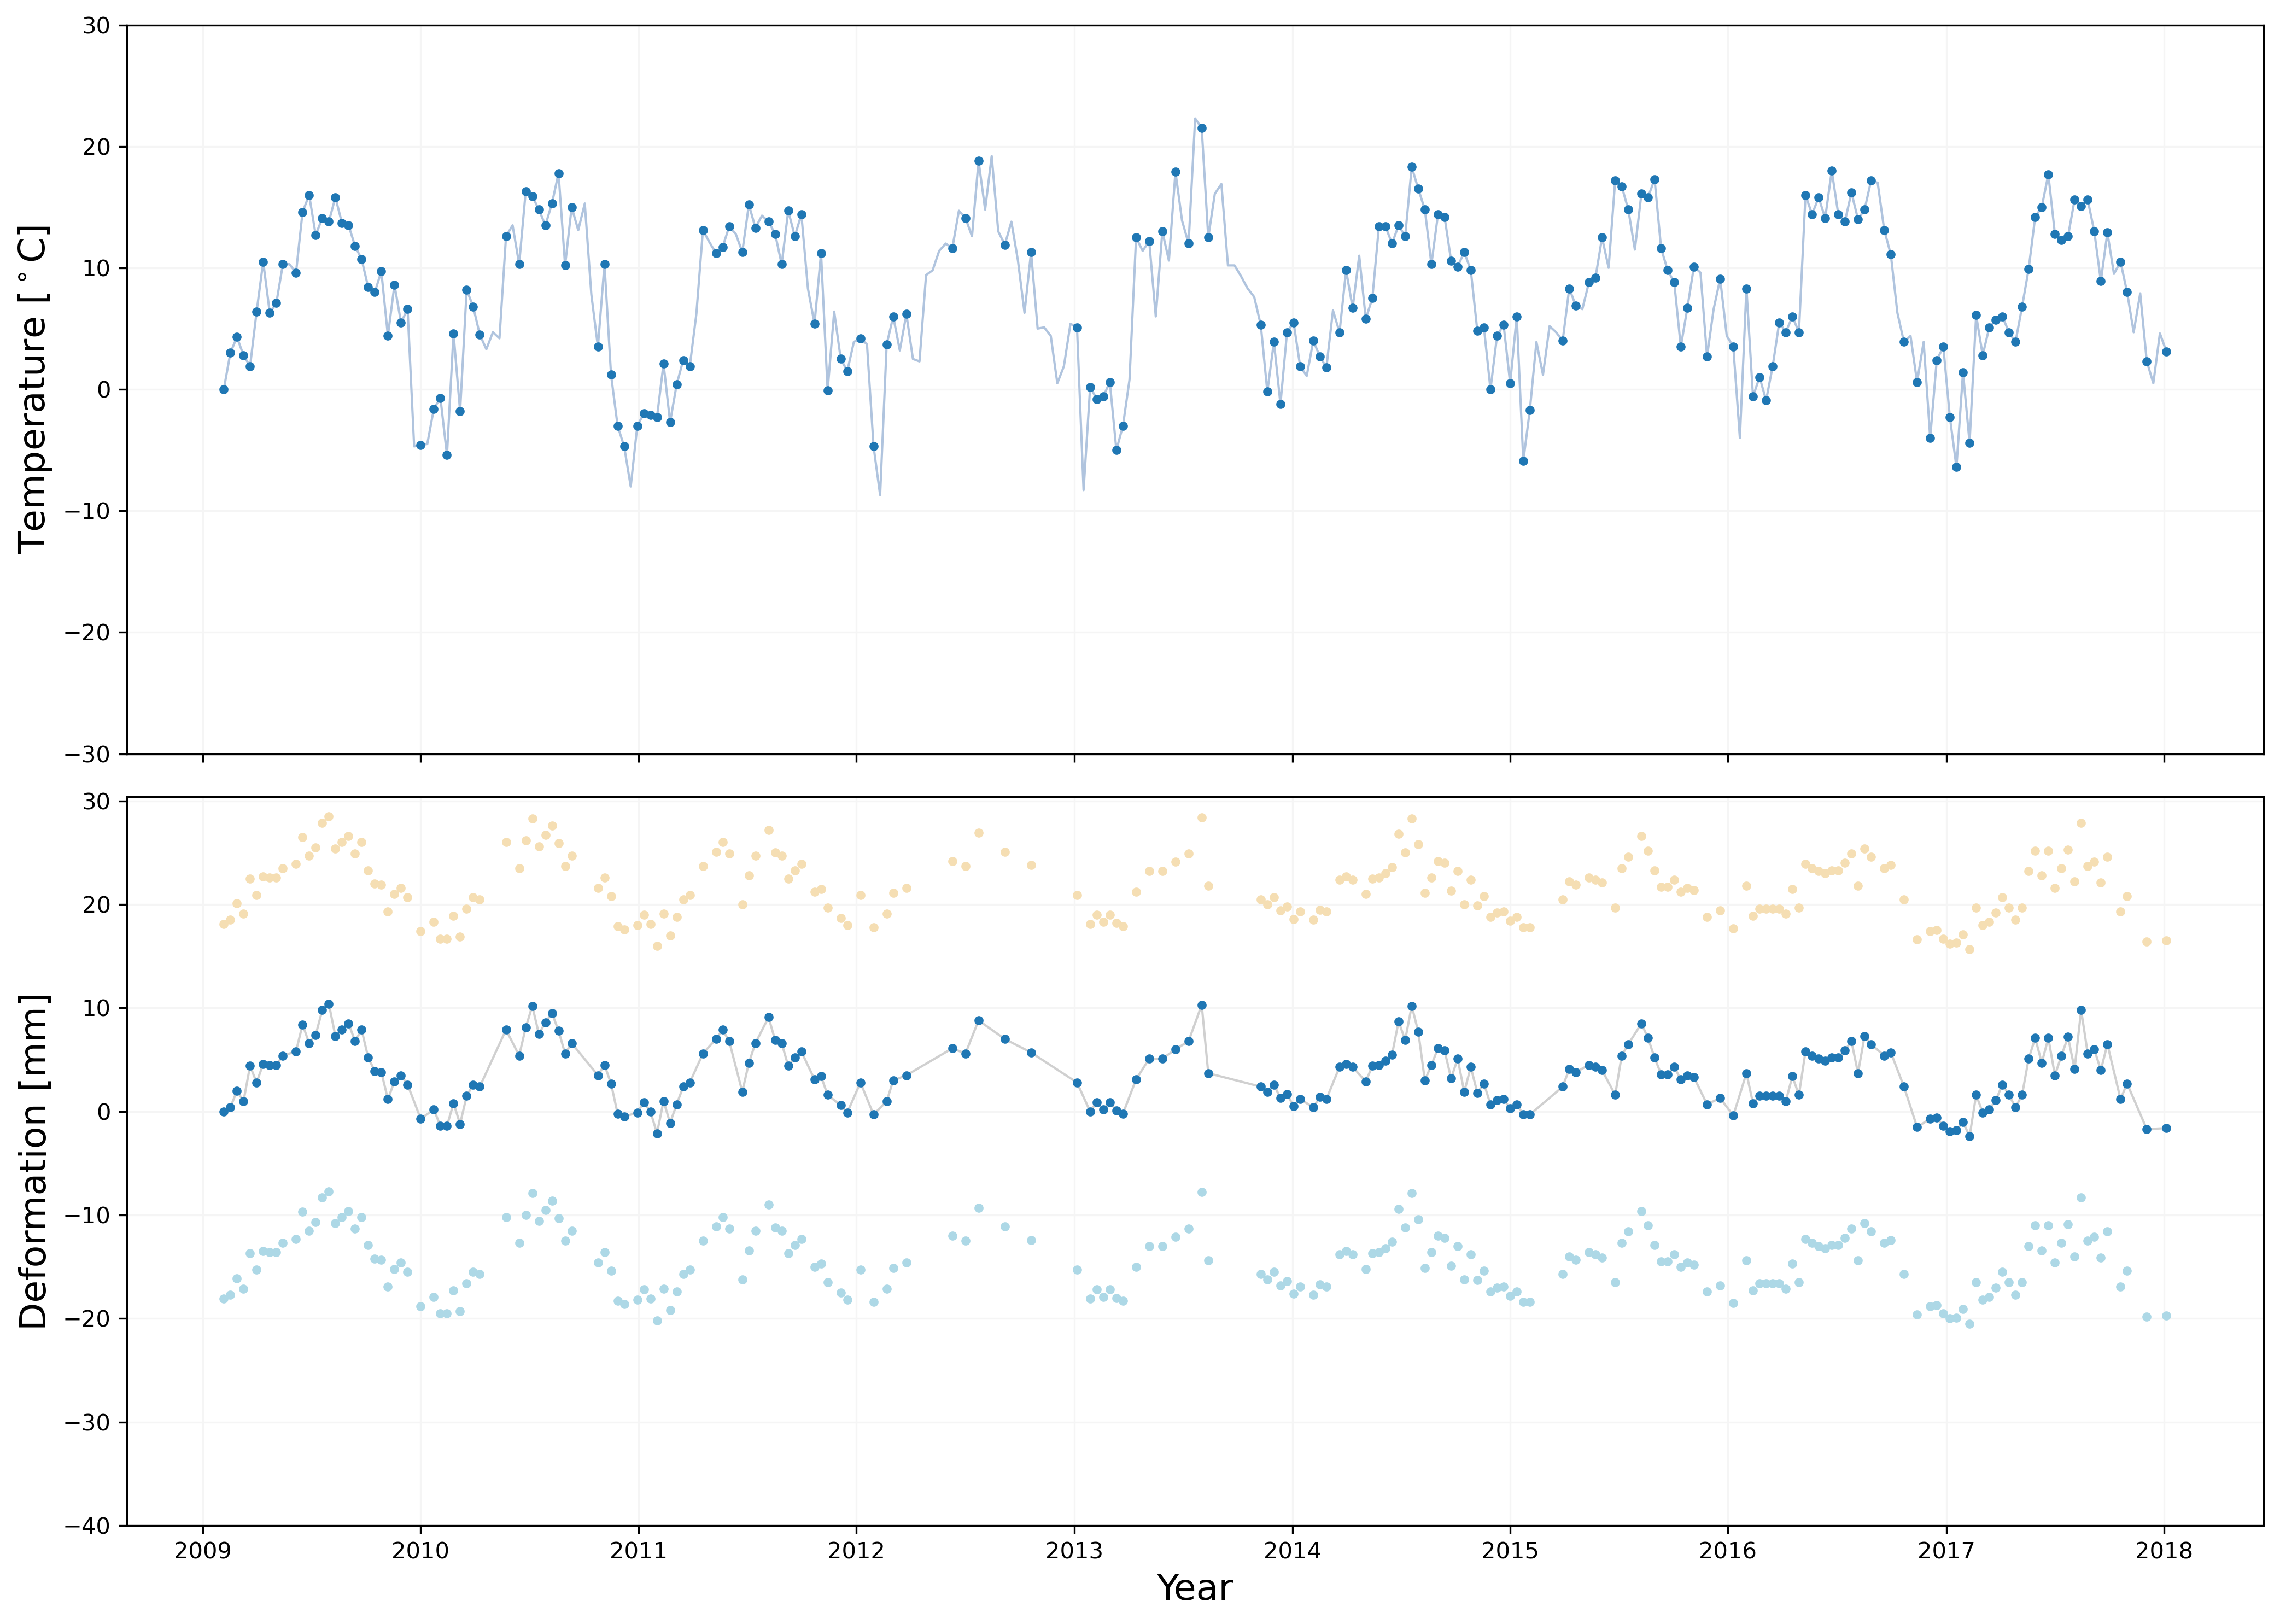

In [14]:
ts_num_2 = 4304

fig = plt.figure(figsize=(14,10), dpi=300)
gs = gridspec.GridSpec(2, 1) 
ax0 = plt.subplot(gs[0])

# ax0.set_xlabel("Year", fontsize=16)
ax0.set_ylabel("Temperature [$^\circ$C]", fontsize=16)
ax0.grid(True, color="whitesmoke")
ax0.set_axisbelow(True)
ax0.plot(mydata.columns, temperature_orig, 'o', markersize=3, linewidth=1, color='grey', markerfacecolor='C0', markeredgecolor='C0', zorder=10)
ax0.plot(temperature_full/10, '-', linewidth=1, color='lightsteelblue', zorder=5)
ax0.set_ylim(top=30, bottom=-30)
    

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.set_xlabel("Year", fontsize=16)
ax1.set_ylabel("Deformation [mm]", fontsize=16)
ax1.grid(True, color="whitesmoke")
ax1.set_axisbelow(True)
l1, = ax1.plot(mydata.columns, mydata.iloc[ts_num_2, :].T, '-o', 
               markersize=3, linewidth=1, color='#D0D0D0', markerfacecolor='C0', markeredgecolor='C0', label=f'AL{ts_num_2}')
ax1.scatter(mydata.columns, mydata.iloc[ts_num_2, :].T + 18.1, s=9,
                c="wheat")
ax1.scatter(mydata.columns, mydata.iloc[ts_num_2, :].T - 18.1, s=9,
                c="lightblue")

if (mydata.iloc[ts_num_2, :].max() < 5):
    ax1.set_ylim(top=25)
else:
    ax1.set_ylim(top=mydata.iloc[ts_num_2, :].max() + 20)
if (mydata.iloc[ts_num_2, :].min() > -10):
    ax1.set_ylim(bottom=-40)
else:
    ax1.set_ylim(bottom=mydata.iloc[ts_num_2, :].min() - 20)

plt.subplots_adjust(hspace=.03)
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

fig.tight_layout()

### Save the plot ###
    
fig.savefig('temp_and_ts_temp_correlated.jpg', bbox_inches="tight")    
plt.show()
